# Степанушкин Иван, ПИ20-4, «Классификация клиентов организации с применением методов машинного обучения»

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 1 Выбрать набор данных

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')

# 2 Предварительный анализ и очистка данных

Структура набора данных

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
print(df.columns)
print(df.shape)


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')
(30000, 25)


Поиск пустых значений

In [5]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Описание типов данных столбцов

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

Численные показатели данных

In [7]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Распределение целевой переменной - default.payment.next.month

0    23364
1     6636
Name: default.payment.next.month, dtype: int64


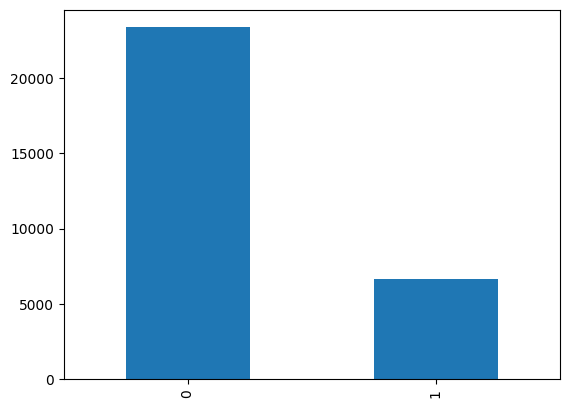

In [8]:
df['default.payment.next.month'].value_counts().plot.bar()
print(df['default.payment.next.month'].value_counts())

## Распределение категориальных признаков

Распределение полов

2    18112
1    11888
Name: SEX, dtype: int64


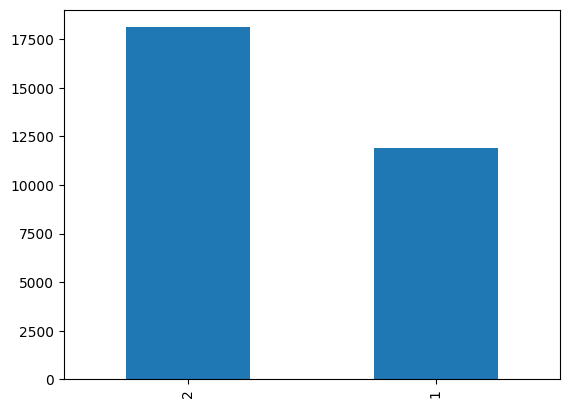

In [9]:
df['SEX'].value_counts().plot.bar()
print(df.SEX.value_counts())

Распределение образования клиентов

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


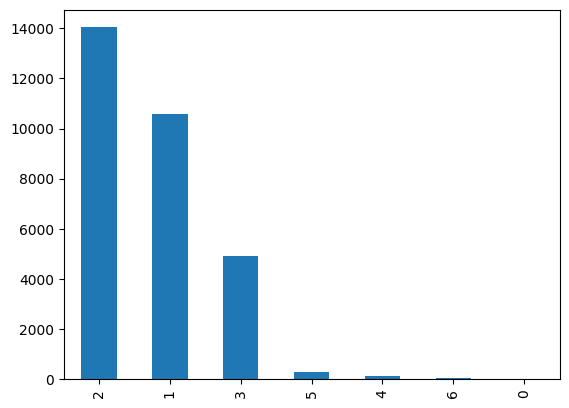

In [10]:
df['EDUCATION'].value_counts().plot.bar()
print(df.EDUCATION.value_counts())

Объединение значений 0, 5, 6 (неизвестно) со значением 4 (другое) из категории Образование

In [11]:
fil = (df.EDUCATION == 5) | (df.EDUCATION==6) | (df.EDUCATION==0) | (df.EDUCATION==4)
df.loc[fil,'EDUCATION']=4

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64


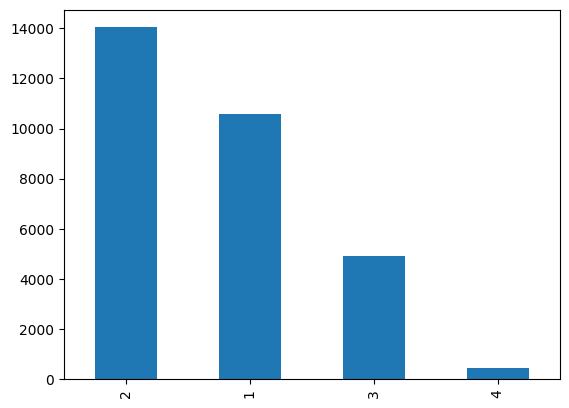

In [12]:
df['EDUCATION'].value_counts().plot.bar()
print(df.EDUCATION.value_counts())

Распределение семейного статуса

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


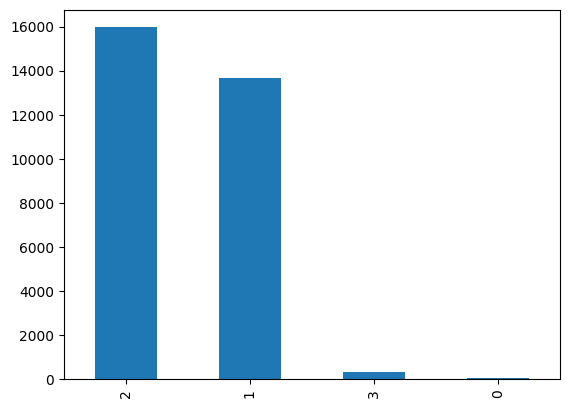

In [13]:
df['MARRIAGE'].value_counts().plot.bar()
print(df.MARRIAGE.value_counts())

Объединение значений семейного положения 0 и 3 и сокращение видов семейного положения до 3: в браке, не в браке, другое

In [14]:
fil = (df.MARRIAGE == 3) | (df.MARRIAGE==0)
df.loc[fil,'MARRIAGE']=3

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64


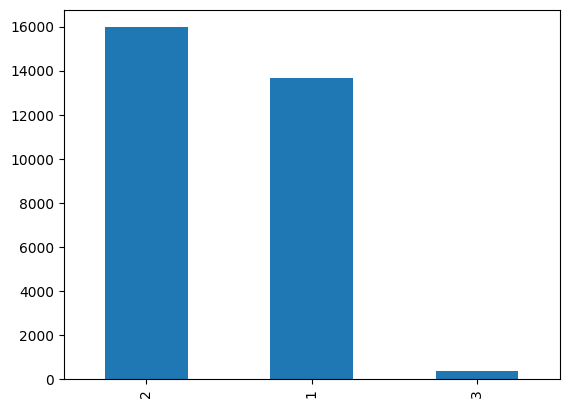

In [15]:
df['MARRIAGE'].value_counts().plot.bar()
print(df.MARRIAGE.value_counts())

Подсчет количества переменных в столбцах статусов погашения платежей

( 0    15730
 -1     6050
  2     3927
 -2     3782
  3      326
  4       99
  1       28
  5       25
  7       20
  6       12
  8        1
 Name: PAY_2, dtype: int64,
  0    15764
 -1     5938
 -2     4085
  2     3819
  3      240
  4       76
  7       27
  6       23
  5       21
  1        4
  8        3
 Name: PAY_3, dtype: int64,
  0    16455
 -1     5687
 -2     4348
  2     3159
  3      180
  4       69
  7       58
  5       35
  6        5
  1        2
  8        2
 Name: PAY_4, dtype: int64,
  0    16947
 -1     5539
 -2     4546
  2     2626
  3      178
  4       84
  7       58
  5       17
  6        4
  8        1
 Name: PAY_5, dtype: int64,
  0    16286
 -1     5740
 -2     4895
  2     2766
  3      184
  4       49
  7       46
  6       19
  5       13
  8        2
 Name: PAY_6, dtype: int64,
 <AxesSubplot: >)

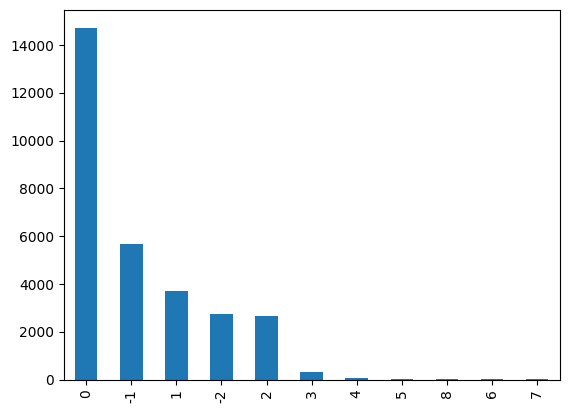

In [16]:
df['PAY_2'].value_counts(), df['PAY_3'].value_counts(), df['PAY_4'].value_counts(), df['PAY_5'].value_counts(), df['PAY_6'].value_counts(), df['PAY_0'].value_counts().plot.bar()

Сокращение переменных до -2, -1, 0, 1, 2, 3

( 0    15730
 -1     6050
  2     3927
 -2     3782
  3      326
  4      157
  1       28
 Name: PAY_2, dtype: int64,
  0    15764
 -1     5938
 -2     4085
  2     3819
  3      240
  4      150
  1        4
 Name: PAY_3, dtype: int64,
  0    16455
 -1     5687
 -2     4348
  2     3159
  3      180
  4      169
  1        2
 Name: PAY_4, dtype: int64,
  0    16947
 -1     5539
 -2     4546
  2     2626
  3      178
  4      164
 Name: PAY_5, dtype: int64,
  0    16286
 -1     5740
 -2     4895
  2     2766
  3      184
  4      129
 Name: PAY_6, dtype: int64,
 <AxesSubplot: >)

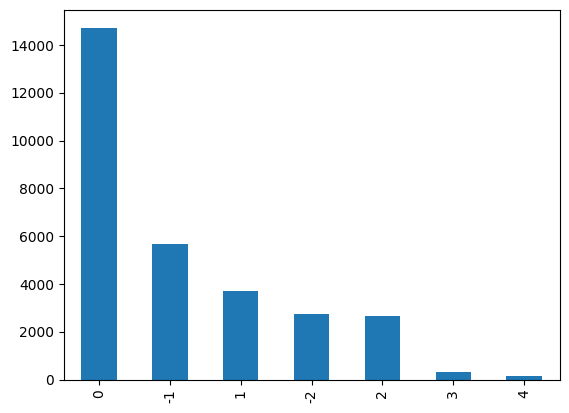

In [17]:
fil = (df.PAY_0 == 4) | (df.PAY_0==5) | (df.PAY_0==6) | (df.PAY_0==7) | (df.PAY_0==8)
df.loc[fil,'PAY_0']=4

fil = (df.PAY_2 == 4) | (df.PAY_2 == 5) | (df.PAY_2 == 7) | (df.PAY_2 == 6) | (df.PAY_2 == 8) 
df.loc[fil,'PAY_2']=4

fil = (df.PAY_3 == 4) | (df.PAY_3 == 5) | (df.PAY_3 == 7) | (df.PAY_3 == 6) | (df.PAY_3 == 8) 
df.loc[fil,'PAY_3']=4

fil = (df.PAY_4 == 4) | (df.PAY_4 == 5) | (df.PAY_4 == 7) | (df.PAY_4 == 6) | (df.PAY_4 == 8) 
df.loc[fil,'PAY_4']=4

fil = (df.PAY_5 == 4) | (df.PAY_5 == 7) | (df.PAY_5 == 5) | (df.PAY_5 == 6) | (df.PAY_5 == 8) 
df.loc[fil,'PAY_5']=4

fil = (df.PAY_6 == 4) | (df.PAY_6 == 7) | (df.PAY_6 == 5) | (df.PAY_6 == 6) | (df.PAY_6 == 8) 
df.loc[fil,'PAY_6']=4

df['PAY_2'].value_counts(), df['PAY_3'].value_counts(), df['PAY_4'].value_counts(), df['PAY_5'].value_counts(), df['PAY_6'].value_counts(), df['PAY_0'].value_counts().plot.bar()

## Количественные переменные

Распределение суммы предоставленного кредита

<AxesSubplot: xlabel='LIMIT_BAL', ylabel='Density'>

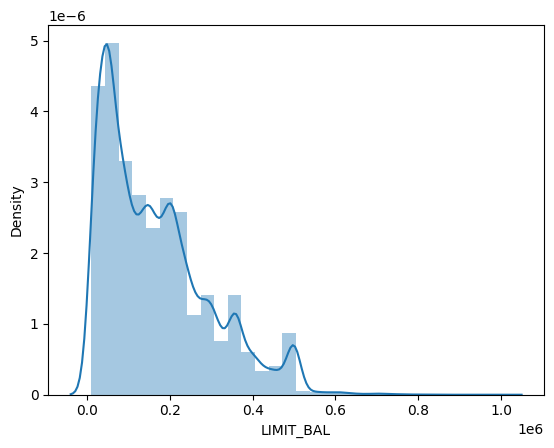

In [18]:
sns.distplot(df['LIMIT_BAL'],kde=True,bins=30)

Большая часть сумм предоставленного кредита находится в промежутке между 0.0 и 0.2 сотнями тысяч

Распределение возраста клиентов

<AxesSubplot: xlabel='AGE', ylabel='Density'>

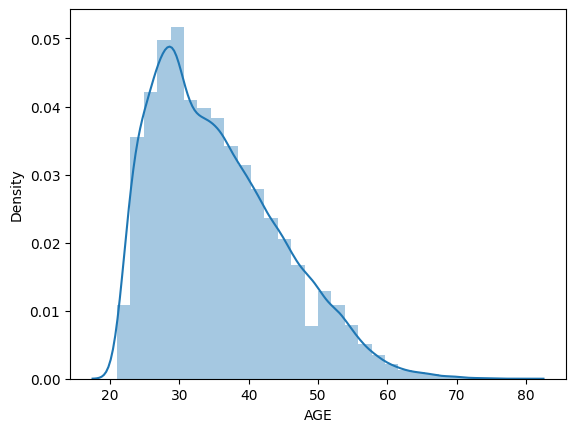

In [19]:
sns.distplot(df['AGE'],kde=True,bins=30)

Распределение сумм предоставленного кредита в зависимости от пола

<AxesSubplot: xlabel='SEX', ylabel='LIMIT_BAL'>

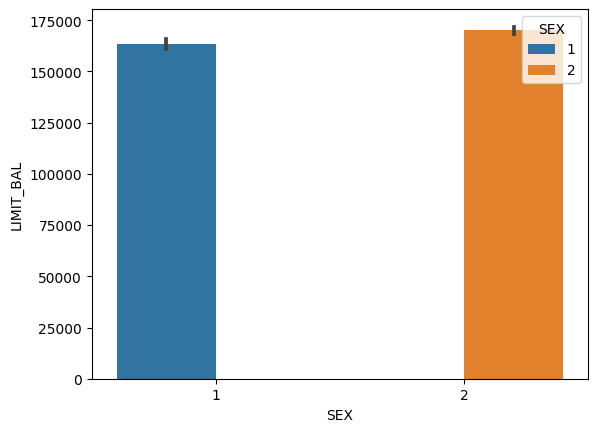

In [20]:
sns.barplot(x='SEX',y='LIMIT_BAL',data=df,hue='SEX')

## Зависимости с целевой переменной

Зависимость своевременного погашения задолженности от пола

<AxesSubplot: xlabel='SEX', ylabel='count'>

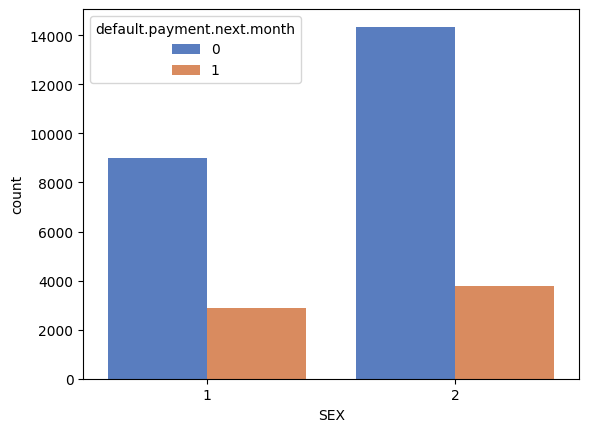

In [21]:
sns.countplot(x='SEX', data=df,hue="default.payment.next.month", palette="muted")  

Зависимость своевременного погашения задолженности от уровня образования

<AxesSubplot: xlabel='EDUCATION', ylabel='count'>

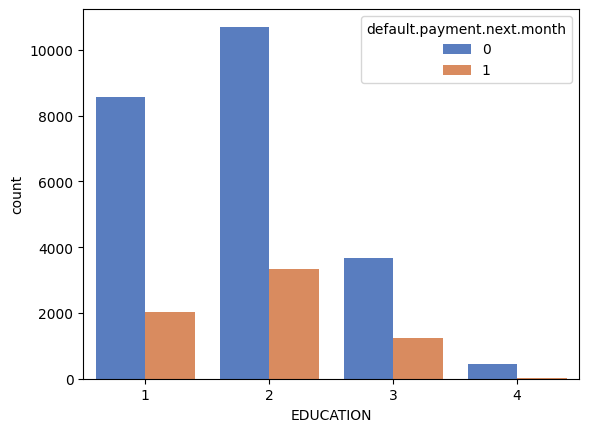

In [22]:
sns.countplot(x='EDUCATION', data=df,hue="default.payment.next.month", palette="muted")  

Зависимость своевременного погашения задолженности от семейного положения

<AxesSubplot: xlabel='MARRIAGE', ylabel='count'>

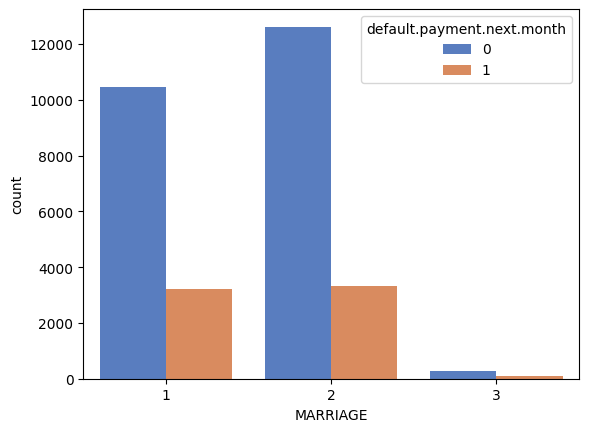

In [23]:
sns.countplot(x='MARRIAGE', data=df,hue="default.payment.next.month", palette="muted")  

Матрица корелляции (зависимости признаков друг от друга)

<AxesSubplot: >

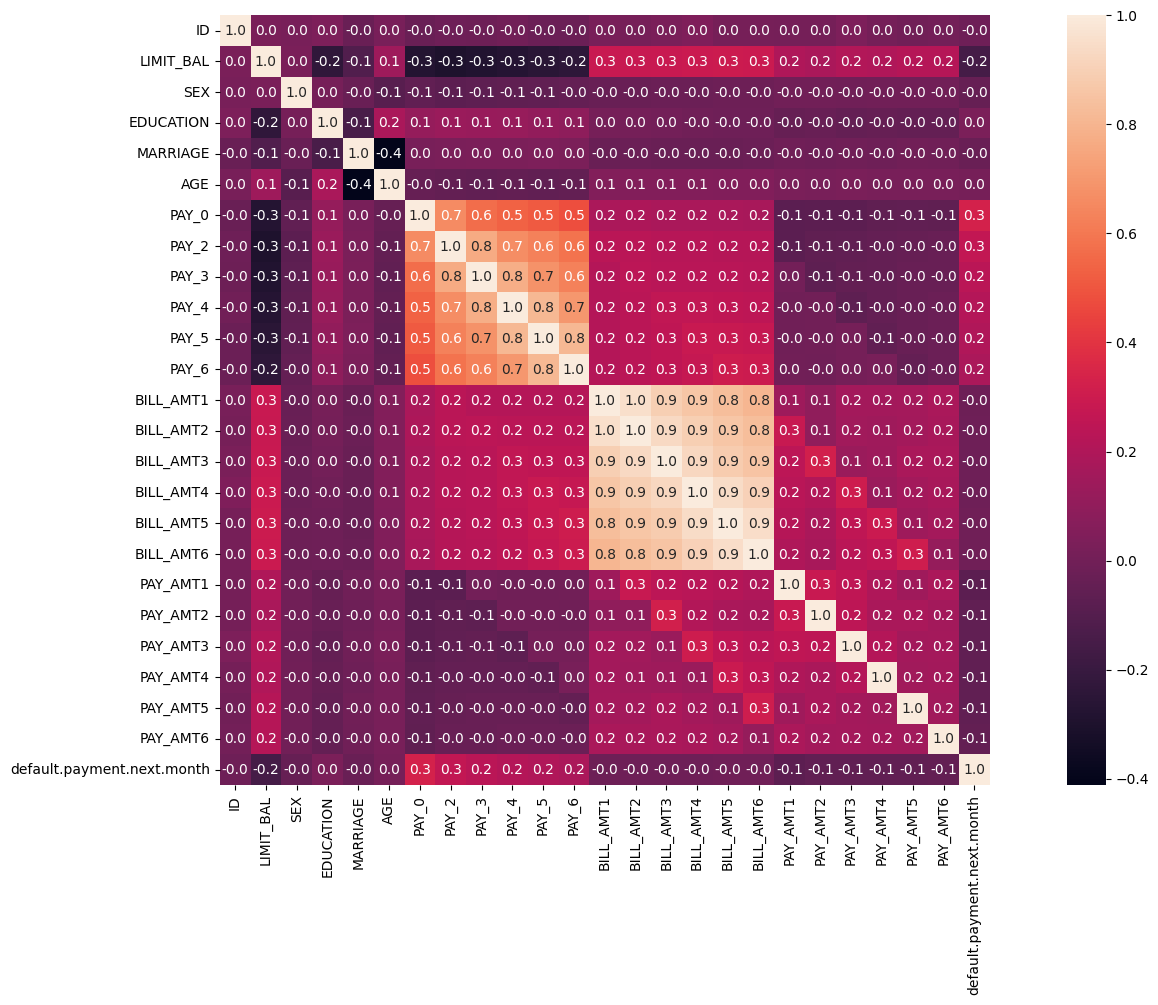

In [24]:
correlation = df.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(correlation, square=True, annot=True, fmt=".1f" )  


Корелляция c целевой переменной (своевременное погашение задолженности)

<AxesSubplot: title={'center': 'Correlation with Default'}>

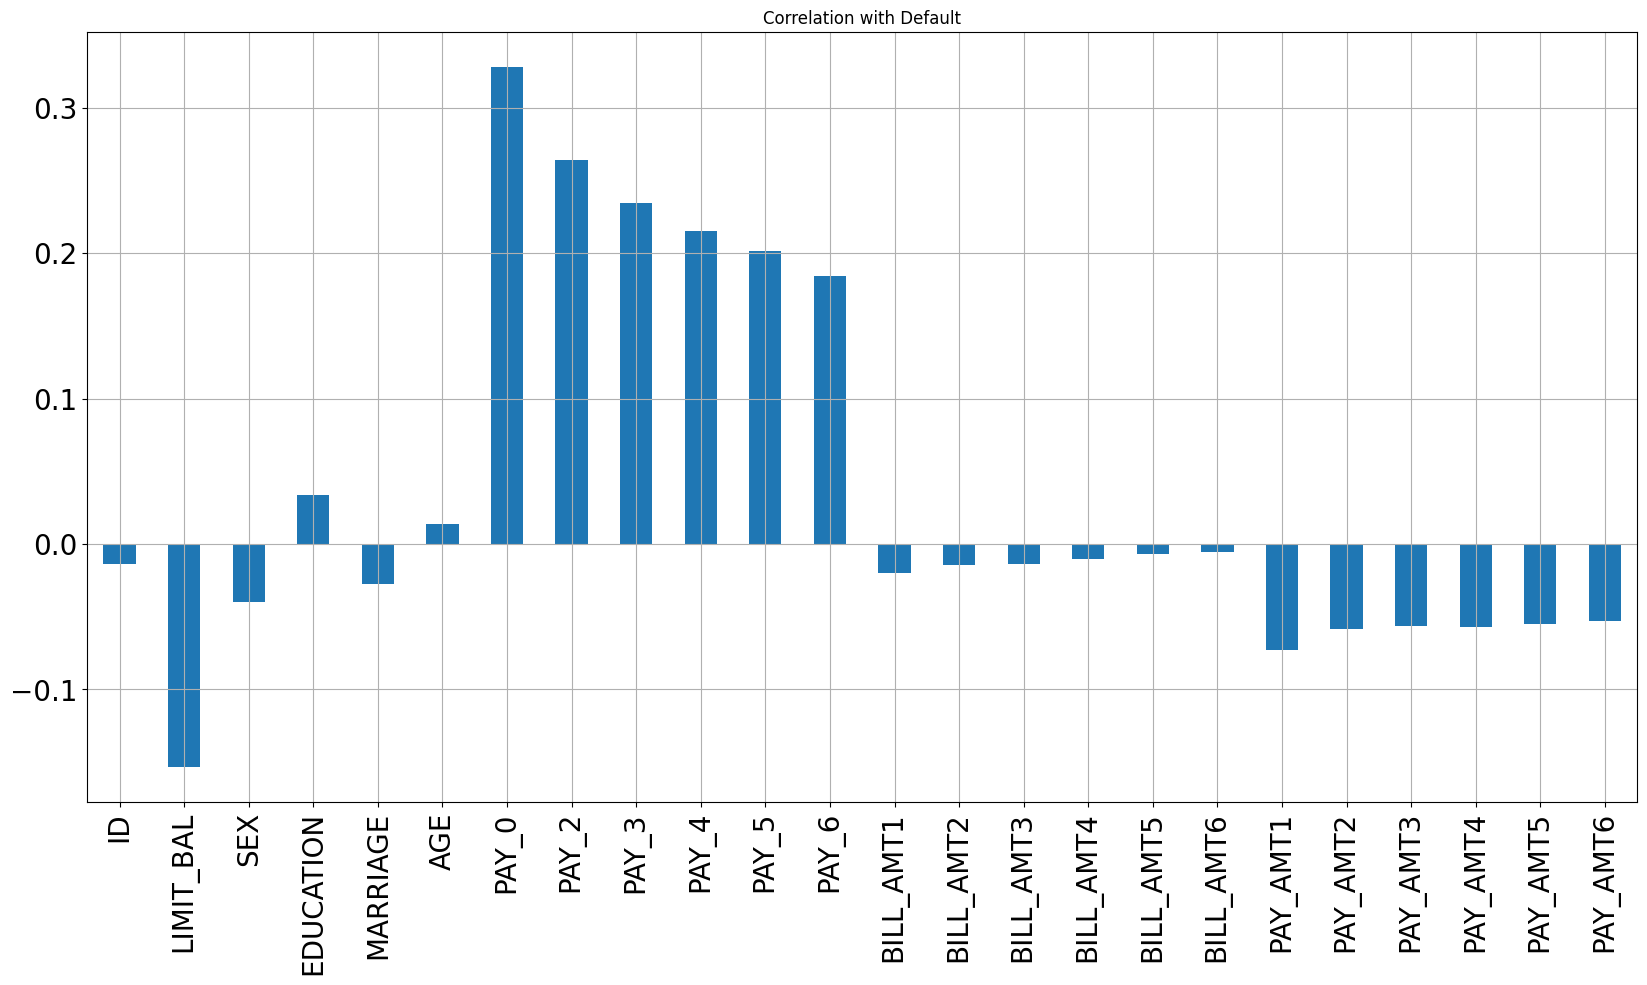

In [25]:
X = df.drop(['default.payment.next.month'],axis=1)
X.corrwith(df['default.payment.next.month']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)

# Преобразование данных

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

## Нормализация данных

Выбор переменных для нормализации

In [27]:
df.columns = df.columns.map(str.lower)
col_to_std = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6']

In [28]:
boxdata = df.loc[:, col_to_std]

<AxesSubplot: >

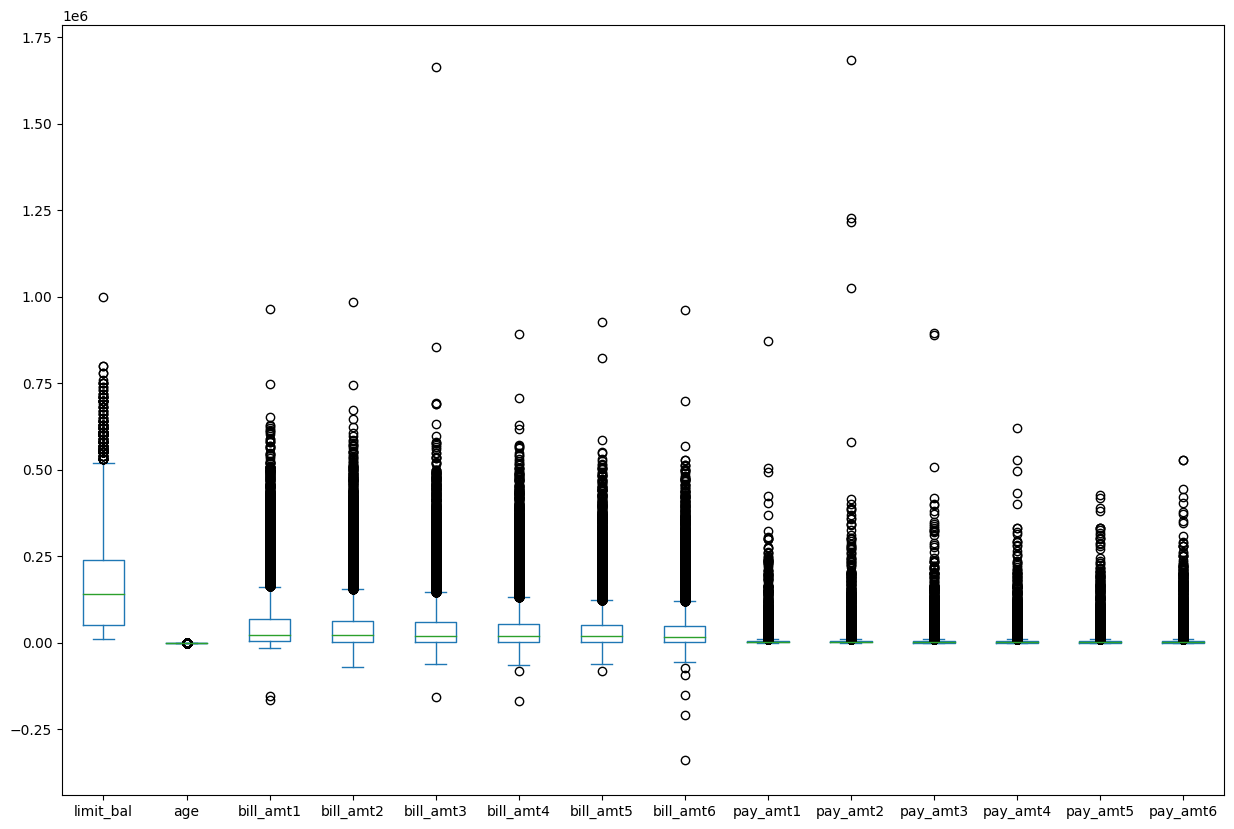

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
boxdata.plot(kind='box', ax=ax)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[col_to_std] = scaler.fit_transform(df[col_to_std])
df.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default.payment.next.month
0,1,-1.136720,2,2,1,-1.246020,2,2,-1,-1,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,2,-0.365981,2,2,2,-1.029047,-1,2,0,0,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,3,-0.597202,2,2,2,-0.161156,0,0,0,0,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,4,-0.905498,2,2,1,0.164303,0,0,0,0,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,5,-0.905498,1,2,1,2.334029,-1,0,-1,0,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0


<AxesSubplot: >

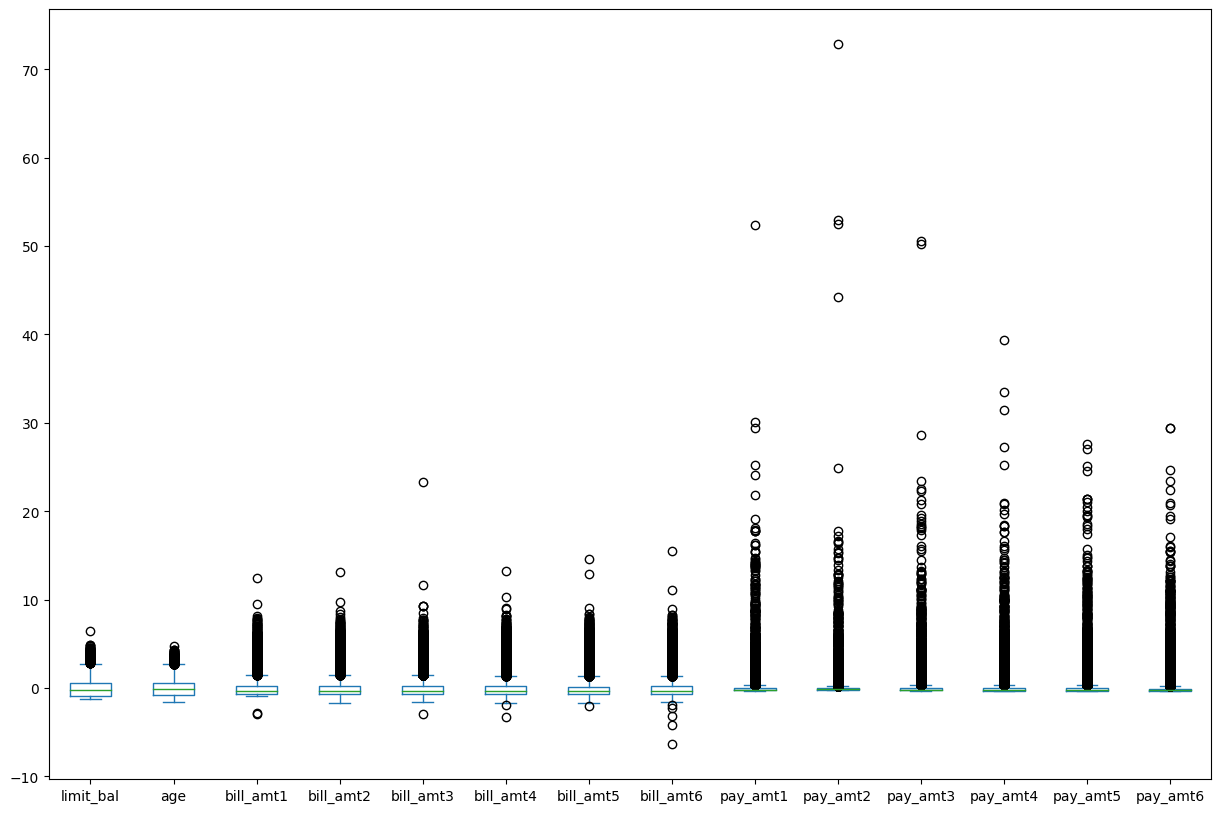

In [31]:
boxdata = df.loc[:, col_to_std]
fig, ax = plt.subplots(1, 1, figsize=(15,10))
boxdata.plot(kind='box', ax=ax)

Данные имеют такое же распределение, но другую размерность

In [32]:
df = df.drop(columns='id')

<AxesSubplot: >

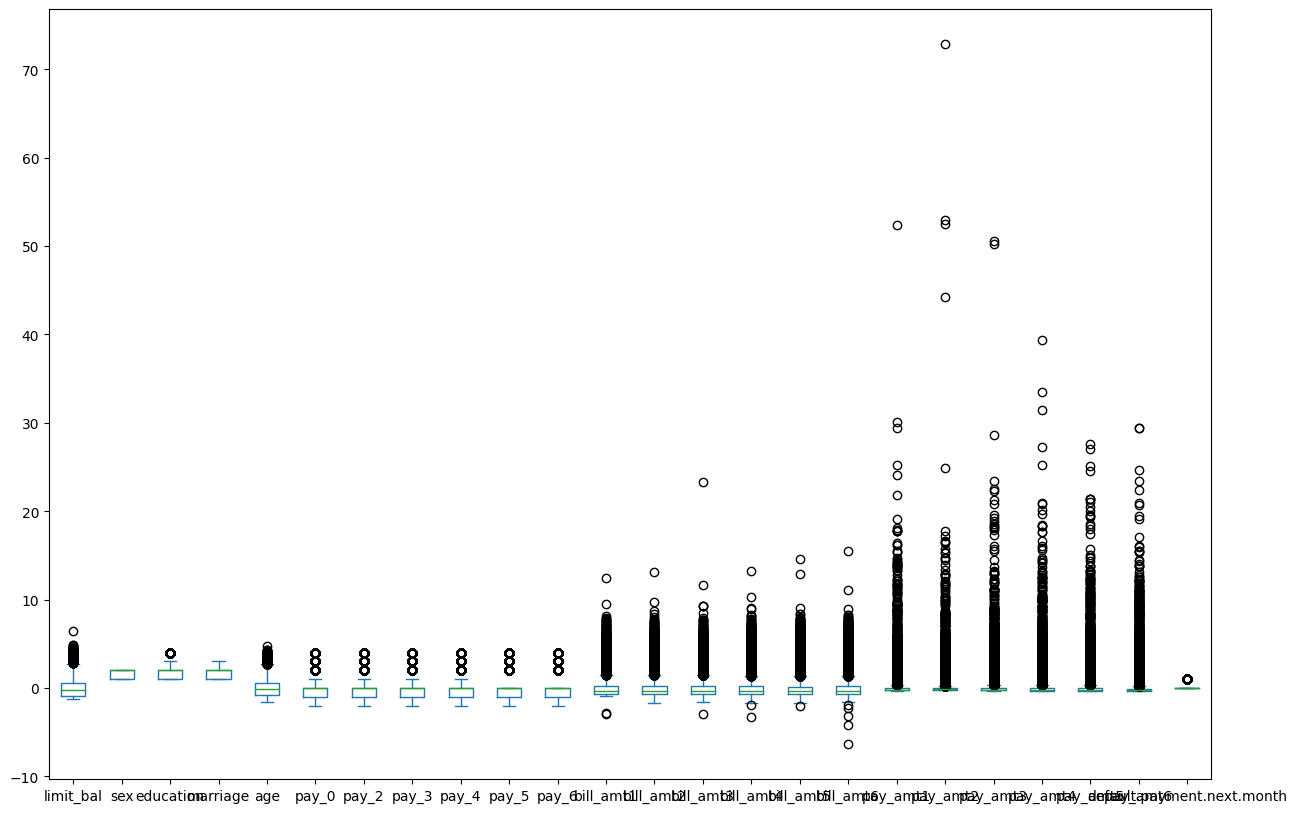

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
plt.xticks(rotation=45)
df.plot(kind='box', ax=ax)

# Обучение модели

## 4 Случайное разделение на тестовую и тренировочную выборки в пропорции 20:80

In [34]:
%%time
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


CPU times: total: 0 ns
Wall time: 11.4 ms


In [35]:
%%time

from imblearn.under_sampling import ClusterCentroids

# Define the undersampling strategy
undersample = ClusterCentroids(random_state=42)

# Fit and transform the data
X_resampled, y_resampled = undersample.fit_resample(X, y)

CPU times: total: 12min 44s
Wall time: 3min 33s


In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size = 0.3,stratify=y_resampled, random_state = 1)
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify=y, random_state = 1)

In [37]:
print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")
print(f"Классы в y_train:\n{y_train}")
print(f"Классы в y_test:\n{y_test}")

Количество строк в y_train по классам: [4645 4645]
Количество строк в y_test по классам: [1991 1991]
Классы в y_train:
[0 1 0 ... 1 0 1]
Классы в y_test:
[1 1 0 ... 1 0 0]


In [38]:
from sklearn.model_selection import GridSearchCV

## 5 Классификация с использованием различных методов

## Логистическая регрессия

In [39]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=1)
#%time logmodel.fit(X_train,y_train)

In [40]:
%%time
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', None], 'C': np.arange(0.1, 2.1, 0.1)}
grid_search = GridSearchCV(logmodel, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

CPU times: total: 1.61 s
Wall time: 4.98 s


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
                         'penalty': ['l1', 'l2', 'elasticnet', None]})

In [41]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

{'C': 0.1, 'penalty': 'l2'}
LogisticRegression(C=0.1, random_state=1)
0.7223896663078578


In [42]:
%time y_pred = grid_search.predict(X_test)

CPU times: total: 0 ns
Wall time: 0 ns


In [43]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

LRresults = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(LRresults)


                 Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Logistic Regression  0.736565    0.70425  0.815671  0.755876  0.736565


Матрица ошибок

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot: >

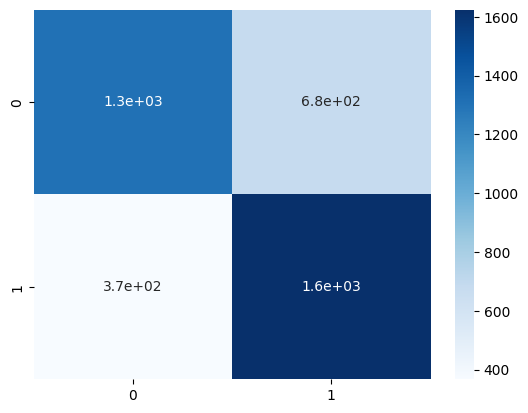

In [45]:
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 10})

Кривая обучения

In [46]:
%%time

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

CPU times: total: 15.6 ms
Wall time: 681 ms


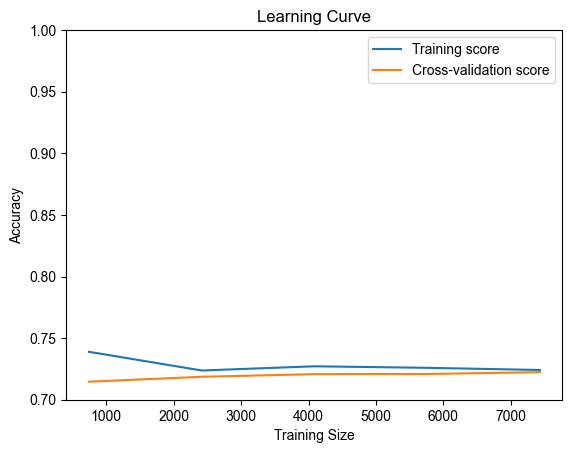

In [47]:
# Рисуем кривую обучения
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')


# Настраиваем график
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.ylim(0.7, 1.0)
sns.set(rc={'figure.figsize':(10,5)})
plt.show()

In [48]:
print(np.mean(train_scores))
print(np.mean(test_scores))

0.7279573324607606
0.7194617868675995


Построение ROC-кривой

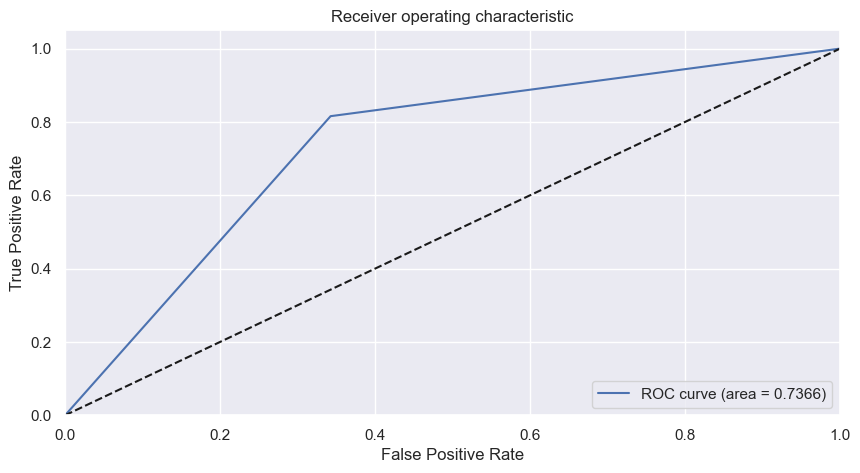

CPU times: total: 109 ms
Wall time: 172 ms


In [49]:
%%time
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = grid_search.predict_proba(X_test)[:, 1]

# Считаем значения false positive rate и true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Считаем площадь под ROC-кривой
roc_auc = roc_auc_score(y_test, y_pred)

# Рисуем ROC-кривую
plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
sns.set_style("whitegrid")
plt.show()

## Стохастический градиентный спуск

In [50]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=1)
#%time sgd.fit(X_train, y_train)

In [51]:
%%time
param_grid = {'loss': ['log_loss', 'log', 'modified_huber'], 'alpha': np.arange(0.00005, 0.00021, 0.00005), 'tol': np.arange(0.0005, 0.0021, 0.0005)}
grid_search = GridSearchCV(sgd, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

CPU times: total: 469 ms
Wall time: 2.55 s


GridSearchCV(cv=5, estimator=SGDClassifier(random_state=1), n_jobs=-1,
             param_grid={'alpha': array([5.0e-05, 1.0e-04, 1.5e-04, 2.0e-04]),
                         'loss': ['log_loss', 'log', 'modified_huber'],
                         'tol': array([0.0005, 0.001 , 0.0015, 0.002 ])})

In [52]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

{'alpha': 0.0002, 'loss': 'log_loss', 'tol': 0.002}
SGDClassifier(alpha=0.0002, loss='log_loss', random_state=1, tol=0.002)
0.7145317545748117


In [53]:
y_pred = grid_search.predict(X_test)

In [54]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

SGDresults = pd.DataFrame([['Stochastic Gradient Descent', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
SGDresults


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Stochastic Gradient Descent,0.715721,0.691827,0.778001,0.732388,0.715721


Матрица ошибок

In [55]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot: >

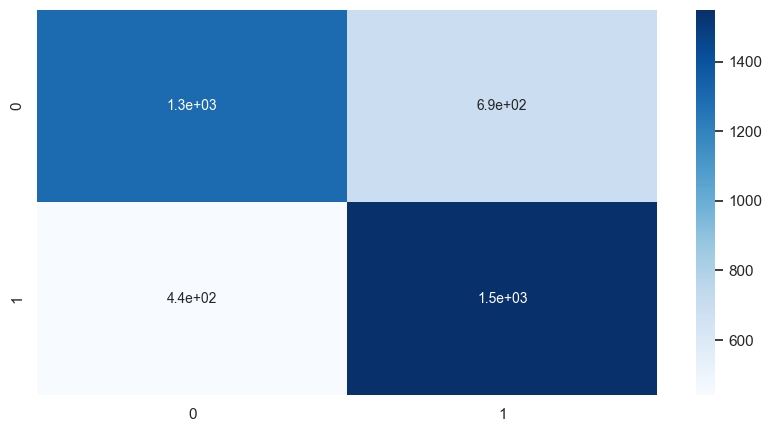

In [56]:
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 10})

Кривая обучения

In [57]:
%%time

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

CPU times: total: 500 ms
Wall time: 710 ms


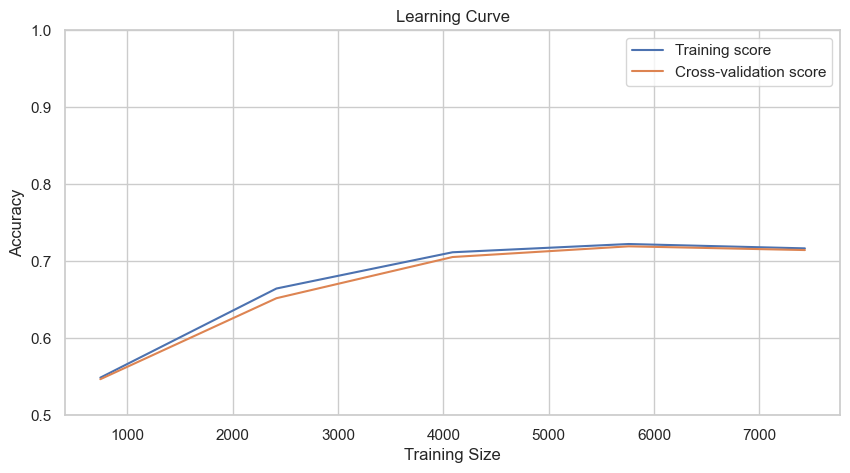

In [58]:
# Рисуем кривую обучения
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')


# Настраиваем график
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.ylim(0.5, 1.0)
sns.set(rc={'figure.figsize':(10,5)})
plt.show()

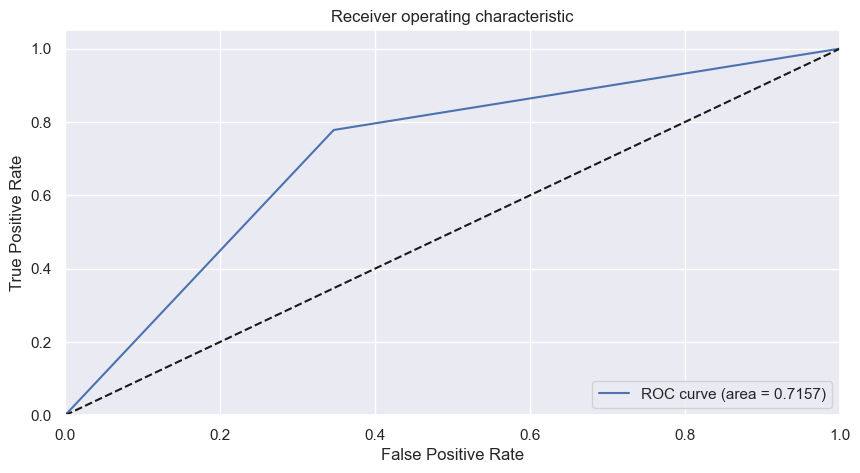

CPU times: total: 141 ms
Wall time: 168 ms


In [59]:
%%time
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = grid_search.predict_proba(X_test)[:, 1]

# Считаем значения false positive rate и true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Считаем площадь под ROC-кривой
roc_auc = roc_auc_score(y_test, y_pred)

# Рисуем ROC-кривую
plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
sns.set_style("whitegrid")
plt.show()

## Метод k-ближайших соседей

In [60]:
%%time

from sklearn.neighbors import KNeighborsClassifier
'''
error_rate = []

# Подбор оптимального k
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    '''

CPU times: total: 0 ns
Wall time: 0 ns


'\nerror_rate = []\n\n# Подбор оптимального k\nfor i in range(1,30):\n    \n    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)\n    knn.fit(X_train,y_train)\n    pred_i = knn.predict(X_test)\n    error_rate.append(np.mean(pred_i != y_test))\n    '

In [61]:
%%time
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 41, 3), 'leaf_size': np.arange(1, 41, 3)}
grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


CPU times: total: 1.52 s
Wall time: 13.2 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40]),
                         'n_neighbors': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40])})

In [62]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

{'leaf_size': 1, 'n_neighbors': 16}
KNeighborsClassifier(leaf_size=1, n_neighbors=16)
0.727341227125942


In [63]:
'''plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')'''

"plt.figure(figsize=(10,6))\nplt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',\n         markerfacecolor='red', markersize=10)\nplt.title('Error Rate vs. K Value')\nplt.xlabel('K')\nplt.ylabel('Error Rate')"

In [64]:
''' print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))) '''

' print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))) '

In [65]:
'''knn = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)),n_jobs=-1)
%time knn.fit(X_train,y_train)'''

'knn = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)),n_jobs=-1)\n%time knn.fit(X_train,y_train)'

In [66]:
y_pred = grid_search.predict(X_test)

In [67]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

KNNresults = pd.DataFrame([['K Neighbors', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
KNNresults


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K Neighbors,0.740834,0.72417,0.778001,0.750121,0.740834


In [68]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot: >

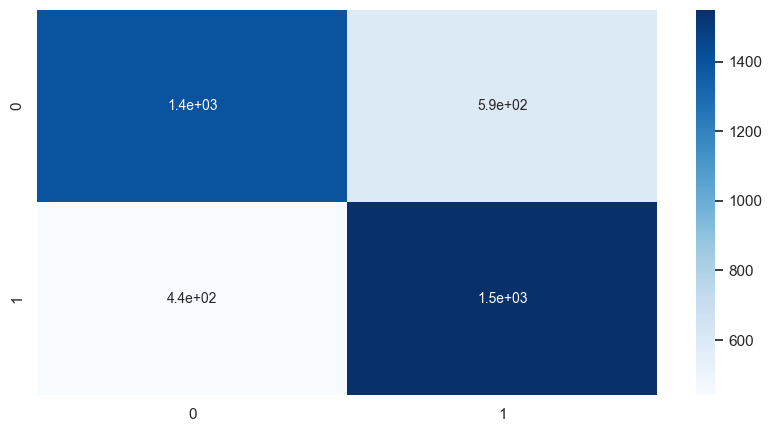

In [69]:
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 10})

Кривая обучения

%%time

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(knn, X, y, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [70]:
%%time

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_train, y_train, cv=5, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

CPU times: total: 31.2 ms
Wall time: 1.2 s


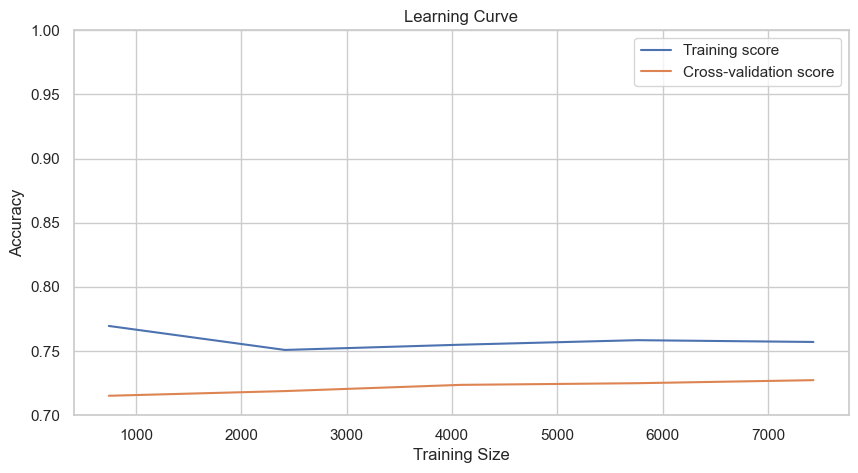

In [71]:
# Рисуем кривую обучения
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')


# Настраиваем график
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.ylim(0.7, 1.0)
sns.set(rc={'figure.figsize':(10,5)})
plt.show()

Построение ROC-кривой

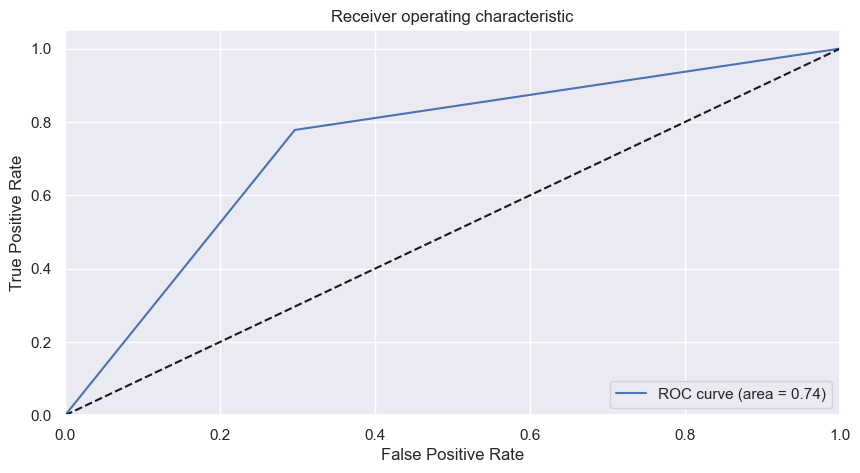

CPU times: total: 1.73 s
Wall time: 247 ms


In [72]:
%%time
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = grid_search.predict_proba(X_test)[:, 1]

# Считаем значения false positive rate и true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Считаем площадь под ROC-кривой
roc_auc = roc_auc_score(y_test, y_pred)

# Рисуем ROC-кривую
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
sns.set_style("whitegrid")
plt.show()

## Метод опорных векторов

In [73]:
from sklearn.svm import SVC
svc = SVC(random_state = 1, probability= True)
#%time svc.fit(X_train, y_train)

In [74]:
%%time
param_grid = {'C': np.arange(0.5, 2.1, 0.5),'degree':np.arange(2,5,1)}
grid_search = GridSearchCV(svc, param_grid, n_jobs=-1)
grid_search.fit(X_train, y_train)

CPU times: total: 16.2 s
Wall time: 2min 58s


GridSearchCV(estimator=SVC(probability=True, random_state=1), n_jobs=-1,
             param_grid={'C': array([0.5, 1. , 1.5, 2. ]),
                         'degree': array([2, 3, 4])})

In [75]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_estimator_.support_)

{'C': 1.5, 'degree': 2}
SVC(C=1.5, degree=2, probability=True, random_state=1)
0.748762109795479
[   0    4   11 ... 9278 9279 9289]


In [76]:
y_pred = grid_search.predict(X_test)

In [77]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

SVCresults = pd.DataFrame([['Support Vector Classification', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

SVCresults

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Support Vector Classification,0.754395,0.72089,0.830236,0.771709,0.754395


In [78]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot: >

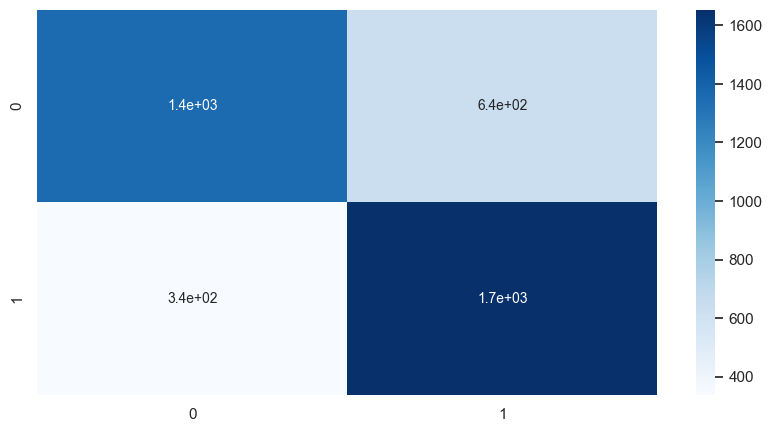

In [79]:
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 10})

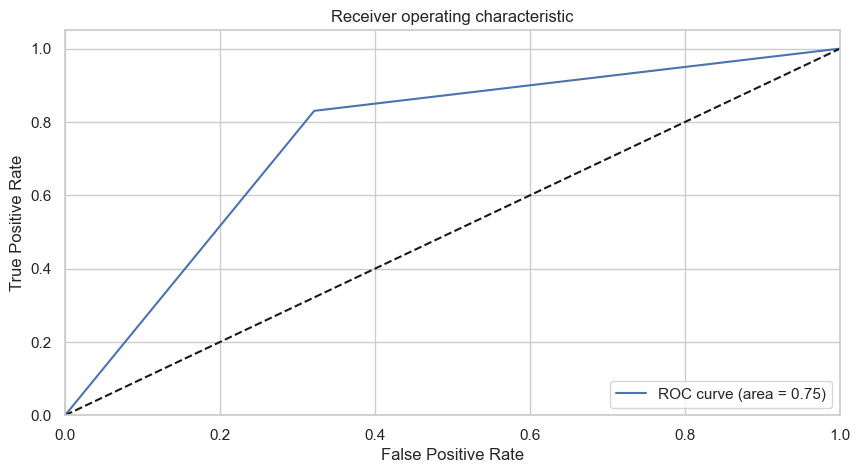

CPU times: total: 2.28 s
Wall time: 2.46 s


In [80]:
%%time
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = grid_search.predict_proba(X_test)[:, 1]

# Считаем значения false positive rate и true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Считаем площадь под ROC-кривой
roc_auc = roc_auc_score(y_test, y_pred)

# Рисуем ROC-кривую
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
sns.set_style("whitegrid")
plt.show()

## Дерево решений

In [81]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(random_state = 1)
#%time dct.fit(X_train,y_train)

In [82]:
%%time
param_grid = {'criterion':['gini', 'entropy', 'log_loss'], 'splitter':['best', 'random'], 'min_samples_split': np.arange(2,5,1)}
grid_search = GridSearchCV(dct, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


CPU times: total: 328 ms
Wall time: 1.11 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_split': array([2, 3, 4]),
                         'splitter': ['best', 'random']})

In [83]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'min_samples_split': 3, 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', min_samples_split=3, random_state=1)
0.7272335844994618


In [84]:
y_pred = grid_search.predict(X_test)

In [85]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

DTCresults = pd.DataFrame([['Decision Tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
DTCresults

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree Classifier,0.751632,0.749502,0.755902,0.752688,0.751632


In [86]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot: >

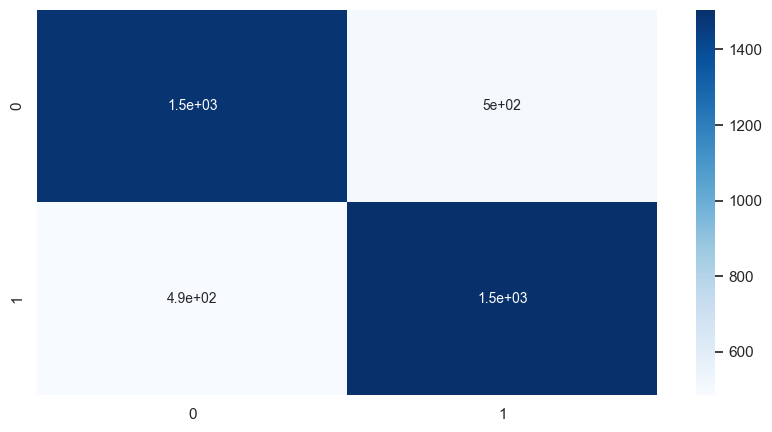

In [87]:
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 10})

In [88]:
'''%%time

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(grid_search, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)'''

'%%time\n\nfrom sklearn.model_selection import learning_curve\n\ntrain_sizes, train_scores, test_scores = learning_curve(grid_search, X_train, y_train, cv=5)\ntrain_mean = np.mean(train_scores, axis=1)\ntrain_std = np.std(train_scores, axis=1)\ntest_mean = np.mean(test_scores, axis=1)\ntest_std = np.std(test_scores, axis=1)'

In [89]:
'''# Рисуем кривую обучения
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')


# Настраиваем график
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.ylim(0.7, 1.0)
sns.set(rc={'figure.figsize':(10,5)})
plt.show()
'''

"# Рисуем кривую обучения\nplt.plot(train_sizes, train_mean, label='Training score')\nplt.plot(train_sizes, test_mean, label='Cross-validation score')\n\n\n# Настраиваем график\nplt.title('Learning Curve')\nplt.xlabel('Training Size')\nplt.ylabel('Accuracy')\nplt.legend(loc='best')\nplt.ylim(0.7, 1.0)\nsns.set(rc={'figure.figsize':(10,5)})\nplt.show()\n"

In [90]:
''' %%time
from sklearn.tree import plot_tree
plt.figure(figsize=(100,50))
plot_tree(dct, feature_names=X_train, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

graph = graphviz.Source(dot_data, format="png") 
graph
'''

' %%time\nfrom sklearn.tree import plot_tree\nplt.figure(figsize=(100,50))\nplot_tree(dct, feature_names=X_train, class_names=[\'0\', \'1\'], filled=True, rounded=True)\nplt.show()\n\ngraph = graphviz.Source(dot_data, format="png") \ngraph\n'

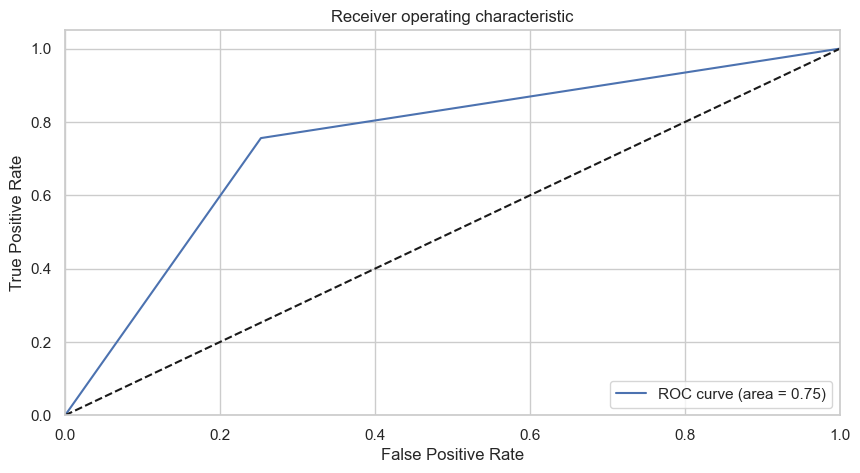

CPU times: total: 156 ms
Wall time: 167 ms


In [91]:
%%time
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = grid_search.predict_proba(X_test)[:, 1]

# Считаем значения false positive rate и true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Считаем площадь под ROC-кривой
roc_auc = roc_auc_score(y_test, y_pred)

# Рисуем ROC-кривую
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
sns.set_style("whitegrid")
plt.show()

## Случайный лес

In [92]:
'''%%time

from sklearn.ensemble import RandomForestClassifier
error_rate = []

# Подбор оптимального n
for i in range(1,100):
    
    rfc = RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 1)
    rfc.fit(X_train,y_train)
    pred_i = rfc.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
'''    


"%%time\n\nfrom sklearn.ensemble import RandomForestClassifier\nerror_rate = []\n\n# Подбор оптимального n\nfor i in range(1,100):\n    \n    rfc = RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 1)\n    rfc.fit(X_train,y_train)\n    pred_i = rfc.predict(X_test)\n    error_rate.append(np.mean(pred_i != y_test))\n"

In [93]:
%%time
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 1)
param_grid = {'criterion':['gini', 'entropy', 'log_loss'],'min_samples_split': np.arange(2,5,1), 'n_estimators':np.arange(50,151,10)}
grid_search = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


CPU times: total: 3.48 s
Wall time: 1min 29s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_split': array([2, 3, 4]),
                         'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150])})

In [94]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'min_samples_split': 4, 'n_estimators': 110}
RandomForestClassifier(criterion='entropy', min_samples_split=4,
                       n_estimators=110, random_state=1)
0.8150699677072121


In [95]:
'''plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. n estimators')
plt.xlabel('K')
plt.ylabel('Error Rate')'''

"plt.figure(figsize=(10,6))\nplt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',\n         markerfacecolor='red', markersize=10)\nplt.title('Error Rate vs. n estimators')\nplt.xlabel('K')\nplt.ylabel('Error Rate')"

In [96]:
'''print("Minimum error:-",min(error_rate),"at n =",error_rate.index(min(error_rate)))'''

'print("Minimum error:-",min(error_rate),"at n =",error_rate.index(min(error_rate)))'

In [97]:
'''rfc = RandomForestClassifier(n_estimators = error_rate.index(min(error_rate)), criterion = 'entropy', random_state = 1)
%time rfc.fit(X_train,y_train)'''

"rfc = RandomForestClassifier(n_estimators = error_rate.index(min(error_rate)), criterion = 'entropy', random_state = 1)\n%time rfc.fit(X_train,y_train)"

In [98]:
y_pred = grid_search.predict(X_test)

In [99]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

RFCresults = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

RFCresults

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random tree Classifier,0.825967,0.820652,0.834254,0.827397,0.825967


In [100]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot: >

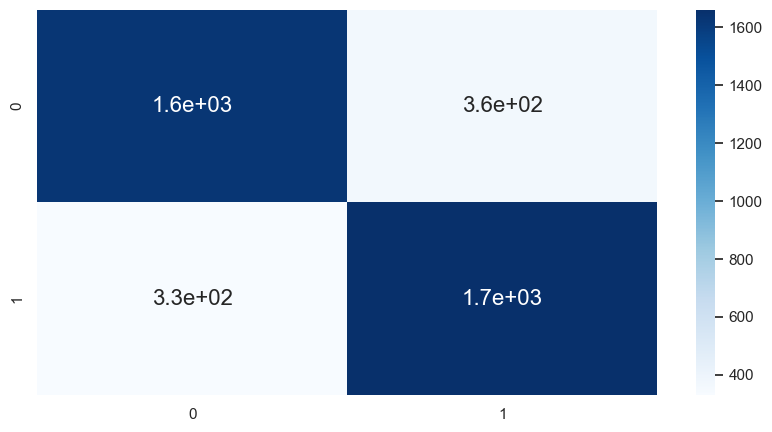

In [101]:
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16})

Кривая обучения

In [102]:
'''%%time

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(grid_search, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)'''

'%%time\n\nfrom sklearn.model_selection import learning_curve\n\ntrain_sizes, train_scores, test_scores = learning_curve(grid_search, X_train, y_train, cv=5)\ntrain_mean = np.mean(train_scores, axis=1)\ntrain_std = np.std(train_scores, axis=1)\ntest_mean = np.mean(test_scores, axis=1)\ntest_std = np.std(test_scores, axis=1)'

In [103]:
'''# Рисуем кривую обучения
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')


# Настраиваем график
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.ylim(0.7, 1.0)
sns.set(rc={'figure.figsize':(10,5)})
plt.show()'''

"# Рисуем кривую обучения\nplt.plot(train_sizes, train_mean, label='Training score')\nplt.plot(train_sizes, test_mean, label='Cross-validation score')\n\n\n# Настраиваем график\nplt.title('Learning Curve')\nplt.xlabel('Training Size')\nplt.ylabel('Accuracy')\nplt.legend(loc='best')\nplt.ylim(0.7, 1.0)\nsns.set(rc={'figure.figsize':(10,5)})\nplt.show()"

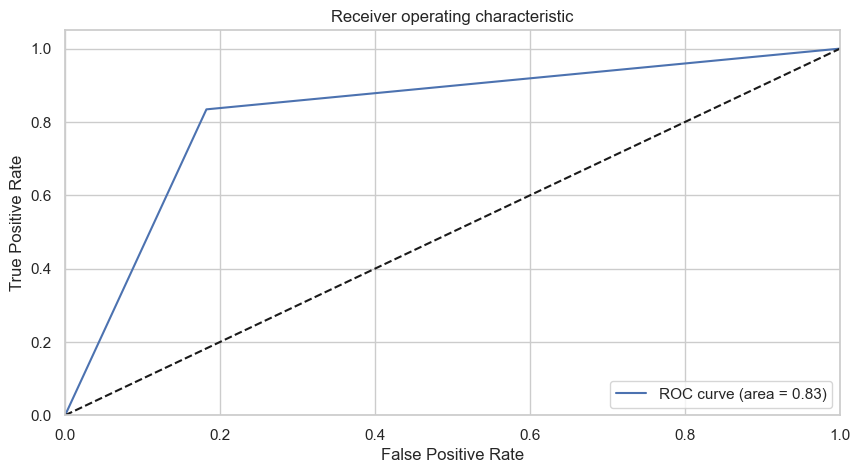

CPU times: total: 203 ms
Wall time: 245 ms


In [104]:
%%time
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = grid_search.predict_proba(X_test)[:, 1]

# Считаем значения false positive rate и true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Считаем площадь под ROC-кривой
roc_auc = roc_auc_score(y_test, y_pred)

# Рисуем ROC-кривую
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
sns.set_style("whitegrid")
plt.show()

## XGBOOST

In [105]:
%%time
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1)
param_grid = {'n_estimators':np.arange(50,151,10), 'booster':['gbtree', 'gblinear' 'dart']}
grid_search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

CPU times: total: 7.31 s
Wall time: 12.4 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=1, ...),
             n_jobs=-1,
             param_grid={'booster': ['gbtree', 'gblineardart'],
                         'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150])})

In [106]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

{'booster': 'gbtree', 'n_estimators': 130}
XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=130, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)
0.8656620021528527


In [107]:
y_pred =grid_search.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

XGBresults = pd.DataFrame([['XGBOOST Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
XGBresults

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBOOST Classifier,0.874686,0.867488,0.88448,0.875902,0.874686


Кривая обучения

In [108]:
%%time

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(grid_search, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

CPU times: total: 1min 38s
Wall time: 2min 10s


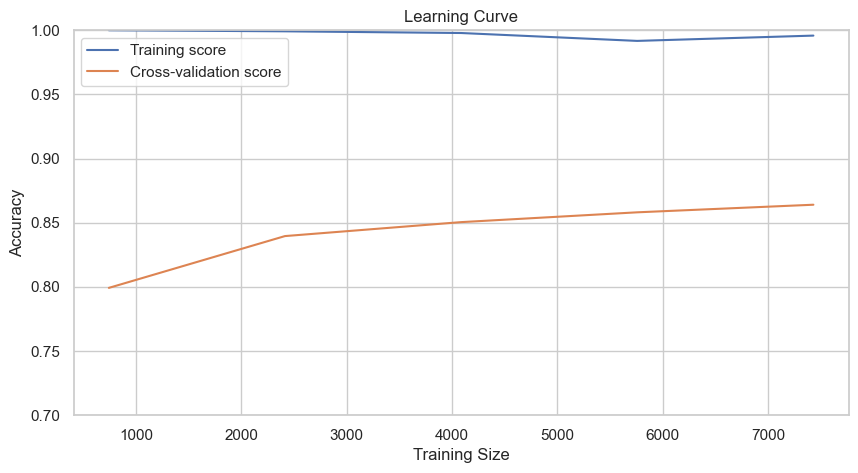

In [109]:
# Рисуем кривую обучения
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')


# Настраиваем график
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.ylim(0.7, 1.0)
sns.set(rc={'figure.figsize':(10,5)})
plt.show()

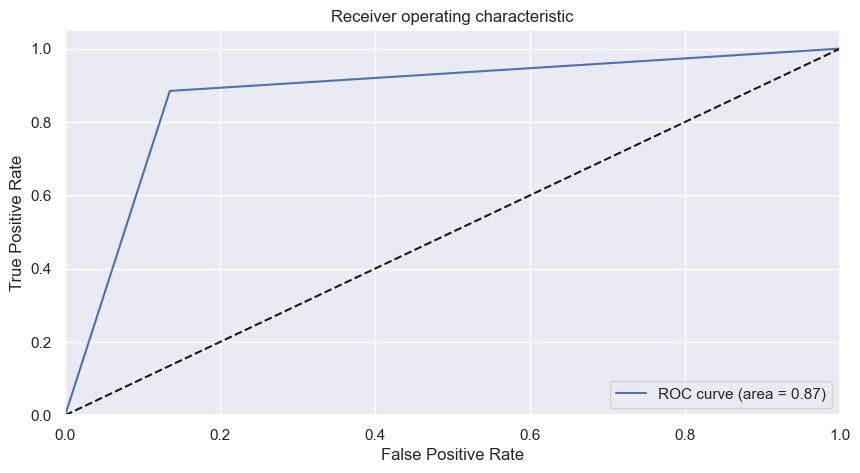

CPU times: total: 1.39 s
Wall time: 203 ms


In [110]:
%%time
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = grid_search.predict_proba(X_test)[:, 1]

# Считаем значения false positive rate и true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Считаем площадь под ROC-кривой
roc_auc = roc_auc_score(y_test, y_pred)

# Рисуем ROC-кривую
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
sns.set_style("whitegrid")
plt.show()

## Наивный байесовский классификатор

In [111]:
%%time
from sklearn.naive_bayes import GaussianNB

nbmodel = GaussianNB()
nbmodel.fit(X_train, y_train)


CPU times: total: 0 ns
Wall time: 6.5 ms


GaussianNB()

In [112]:
y_pred = nbmodel.predict(X_test)

In [113]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

NBresults = pd.DataFrame([['Naive Bayes classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(NBresults)


                    Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Naive Bayes classifier  0.668759   0.610236  0.934204  0.738242  0.668759


In [114]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot: >

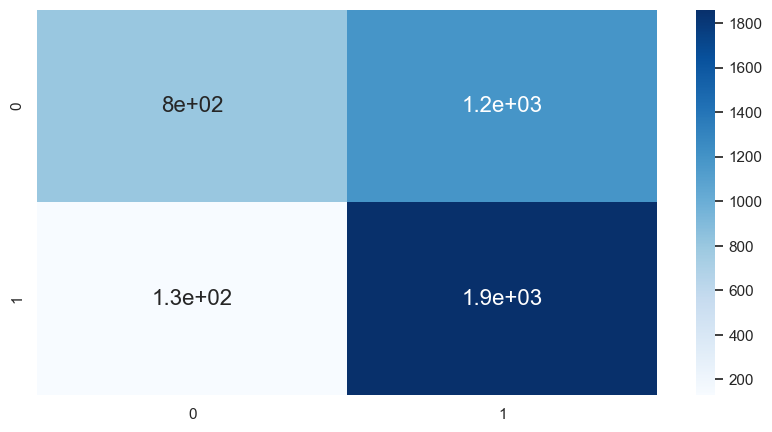

In [115]:
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16})

Кривая обучения

In [116]:
%%time

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(nbmodel, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

CPU times: total: 93.8 ms
Wall time: 111 ms


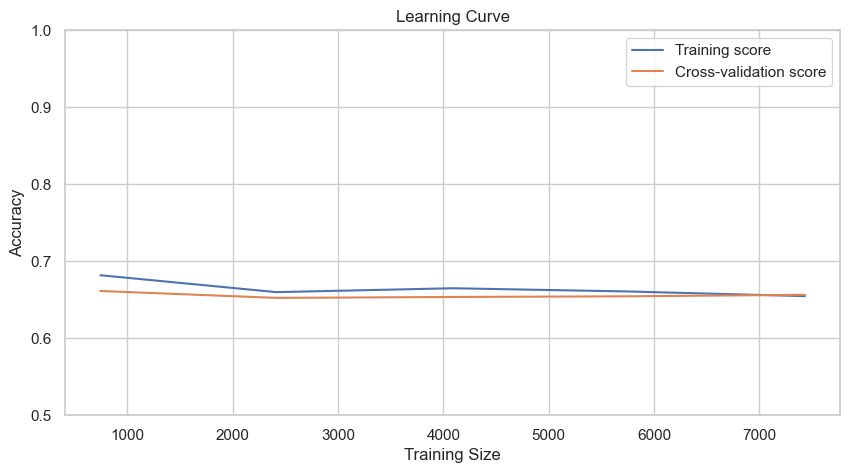

In [117]:
# Рисуем кривую обучения
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')


# Настраиваем график
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.ylim(0.5, 1.0)
sns.set(rc={'figure.figsize':(10,5)})
plt.show()

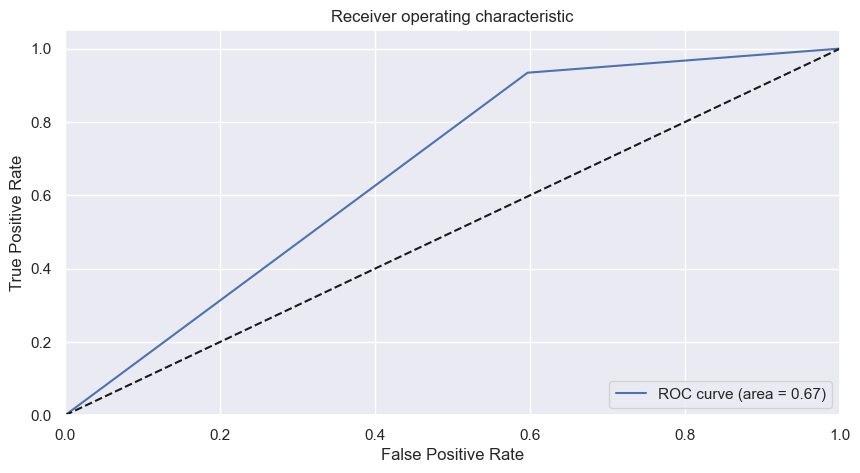

In [118]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = nbmodel.predict_proba(X_test)[:, 1]

# Считаем значения false positive rate и true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Считаем площадь под ROC-кривой
roc_auc = roc_auc_score(y_test, y_pred)

# Рисуем ROC-кривую
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
sns.set_style("whitegrid")
plt.show()

# Сравнение методов классификации

In [119]:
comparation = pd.concat([LRresults, SGDresults, KNNresults, SVCresults, DTCresults, RFCresults, XGBresults, NBresults], ignore_index=True)
comparation

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.736565,0.704250,0.815671,0.755876,0.736565
1,Stochastic Gradient Descent,0.715721,0.691827,0.778001,0.732388,0.715721
2,K Neighbors,0.740834,0.724170,0.778001,0.750121,0.740834
3,Support Vector Classification,0.754395,0.720890,0.830236,0.771709,0.754395
4,Decision Tree Classifier,0.751632,0.749502,0.755902,0.752688,0.751632
5,Random tree Classifier,0.825967,0.820652,0.834254,0.827397,0.825967
6,XGBOOST Classifier,0.874686,0.867488,0.884480,0.875902,0.874686
7,Naive Bayes classifier,0.668759,0.610236,0.934204,0.738242,0.668759


<AxesSubplot: ylabel='Accuracy'>

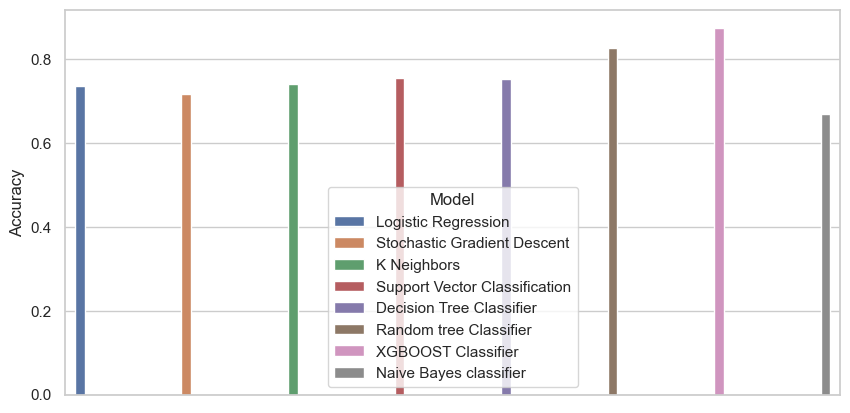

In [120]:
accuracy = sns.barplot(x=comparation['Model'],y=comparation['Accuracy'],data=df,hue=comparation['Model'])
accuracy.set (xlabel='') 
accuracy.set_xticklabels([])
accuracy

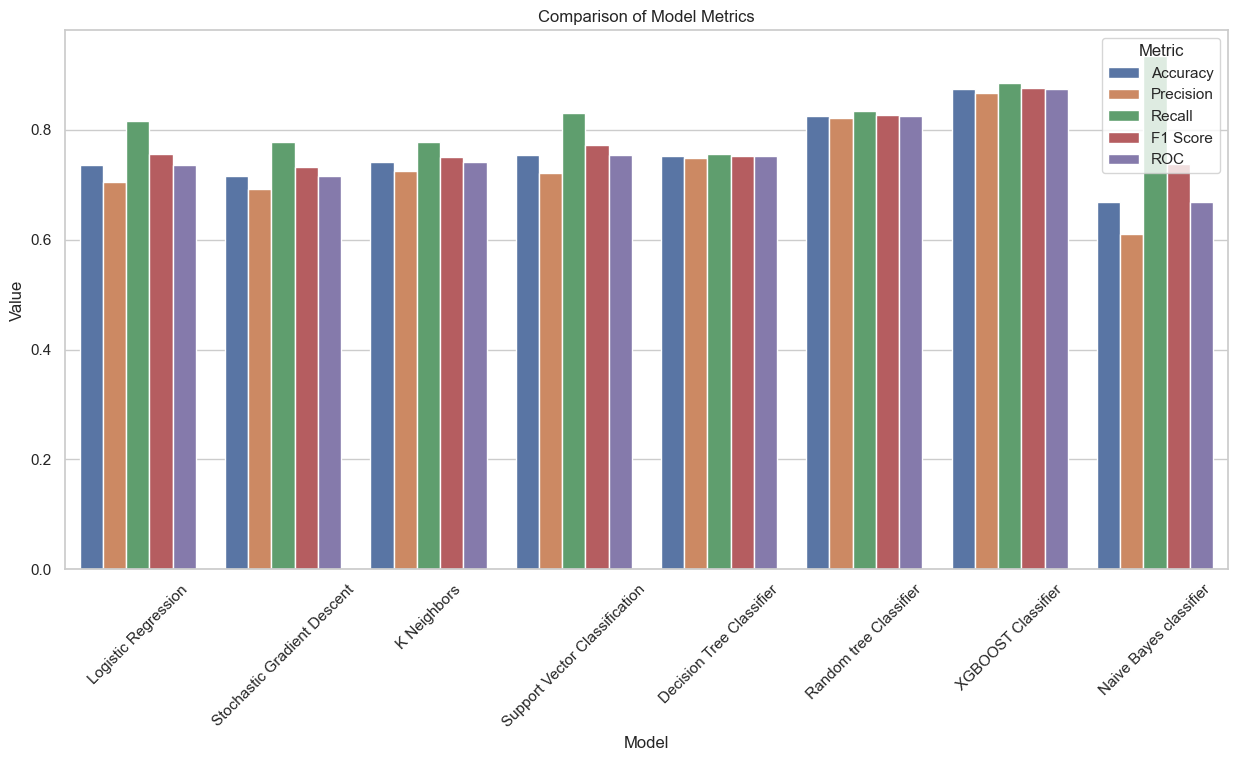

In [121]:
melted_data = pd.melt(comparation, id_vars=['Model'], value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'],
                      var_name='Metric', value_name='Value')

plt.subplots(figsize=(15,7))
sns.barplot(x='Model', y='Value', hue='Metric', data=melted_data)
plt.title('Comparison of Model Metrics')
plt.xlabel('Model')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()